In [1]:
import pandas as pd
import numpy as np
import scipy.io

In [55]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [4]:
mat = scipy.io.loadmat('cumsum_50_90.mat')
#cardio_df = pd.DataFrame(mat)

In [81]:
type(mat)
test = scipy.io.loadmat('test.mat')

In [82]:
test

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Thu Sep 26 21:16:18 2019',
 '__version__': '1.0',
 '__globals__': [],
 'data_test': array([[1, 0, 2, ..., 0, 0, 1],
        [3, 0, 0, ..., 1, 3, 0],
        [3, 1, 3, ..., 0, 5, 4],
        ...,
        [0, 0, 0, ..., 1, 0, 2],
        [0, 1, 0, ..., 3, 2, 1],
        [3, 0, 2, ..., 1, 1, 1]], dtype=uint8)}

In [8]:
#data = mat.values.reshape((n_samples, n_features)) 
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Thu Aug  6 23:42:46 2020',
 '__version__': '1.0',
 '__globals__': [],
 'B': array([[    1,     1,     2, ..., 10183, 10185, 10187],
        [    1,     4,     4, ..., 10055, 10056, 10057],
        [    0,     2,     2, ..., 10133, 10134, 10136],
        ...,
        [    1,     1,     4, ..., 10150, 10151, 10152],
        [    1,     1,     2, ...,  9931,  9934,  9936],
        [    1,     2,     2, ...,  9985,  9989,  9989]], dtype=uint16),
 'ans': array([[    1,     1,     2, ..., 10183, 10185, 10187]], dtype=uint16),
 'data_minus': array([[1, 0, 1, ..., 5, 2, 2],
        [1, 3, 0, ..., 0, 1, 1],
        [0, 2, 0, ..., 4, 1, 2],
        ...,
        [1, 0, 3, ..., 2, 1, 1],
        [1, 0, 1, ..., 3, 3, 2],
        [1, 1, 0, ..., 3, 4, 0]], dtype=uint8),
 'data_plus': array([[4, 1, 3, ..., 1, 1, 0],
        [0, 1, 4, ..., 0, 2, 0],
        [1, 1, 1, ..., 5, 2, 0],
        ...,
        [0, 2, 2, ..., 3, 0, 0],
       

In [29]:
#mat["data_plus"].shape
x = np.arange(1, 101).reshape(10, 10)
x = np.cumsum(x, axis = 1)
y = np.arange(10).reshape(1, -1)
z = np.concatenate((x, y))
#y.shape
z

array([[  1,   3,   6,  10,  15,  21,  28,  36,  45,  55],
       [ 11,  23,  36,  50,  65,  81,  98, 116, 135, 155],
       [ 21,  43,  66,  90, 115, 141, 168, 196, 225, 255],
       [ 31,  63,  96, 130, 165, 201, 238, 276, 315, 355],
       [ 41,  83, 126, 170, 215, 261, 308, 356, 405, 455],
       [ 51, 103, 156, 210, 265, 321, 378, 436, 495, 555],
       [ 61, 123, 186, 250, 315, 381, 448, 516, 585, 655],
       [ 71, 143, 216, 290, 365, 441, 518, 596, 675, 755],
       [ 81, 163, 246, 330, 415, 501, 588, 676, 765, 855],
       [ 91, 183, 276, 370, 465, 561, 658, 756, 855, 955],
       [  0,   1,   2,   3,   4,   5,   6,   7,   8,   9]])

In [150]:
test_data = test["data_test"]

cum_test_data = np.cumsum(test["data_test"], axis = 1)
test_label = np.zeros((4000, 1))
test_label[2000:] = 1

test_label[2000]

array([1.])

In [155]:
data_plus_photon = np.cumsum(mat["data_plus"], axis = 1)
data_minus_photon = np.cumsum(mat["data_minus"], axis = 1)
data_zero_photon = np.cumsum(mat["data_zero"], axis = 1)
data_photon_counts = np.concatenate((data_minus_photon, data_plus_photon, data_zero_photon))

In [14]:
data_minus_photon = np.cumsum(mat["data_minus"], axis = 1)

In [15]:
data_zero_photon = np.cumsum(mat["data_zero"], axis = 1)

In [33]:
data_photon_counts = np.concatenate((data_minus_photon, data_plus_photon, data_zero_photon))

In [32]:
data_photon_counts.shape

(10000, 8000)

In [123]:
data_plus_photon.shape
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data_photon_counts = scaler.fit_transform(data_photon_counts)

In [151]:
scaled_test_data = scaler.transform(cum_test_data)

In [36]:
photon_count_label = np.zeros((10000, 1))


In [37]:
del x
photon_count_label[2501:7500] = 1

In [124]:
from sklearn.model_selection import train_test_split

train_x, valid_x, train_y, valid_y = train_test_split(scaled_data_photon_counts, photon_count_label, test_size = 0.15)

In [125]:
tf_photon_count_label = tf.convert_to_tensor(photon_count_label, tf.float32)
tf_data_photon_counts = tf.convert_to_tensor(data_photon_counts, tf.float32)

tf_train_data_photon_counts = tf.convert_to_tensor(train_x, tf.float32)
tf_valid_data_photon_counts = tf.convert_to_tensor(valid_x, tf.float32)
tf_train_photon_count_label = tf.convert_to_tensor(train_y, tf.float32)
tf_valid_photon_count_label = tf.convert_to_tensor(valid_y, tf.float32)

In [127]:
for i in tf_valid_data_photon_counts:
    print(i)

tf.Tensor([2.4458857 2.219385  1.7365916 ... 0.9025688 0.901098  0.899604 ], shape=(8000,), dtype=float32)
tf.Tensor(
[ 0.7298961   0.41427314 -0.21820407 ...  1.137038    1.1367697
  1.1352485 ], shape=(8000,), dtype=float32)
tf.Tensor(
[ 1.587891    0.41427314  1.2478927  ... -0.9326744  -0.9339494
 -0.93400496], shape=(8000,), dtype=float32)
tf.Tensor([-0.9860934 -1.3908386 -1.6843008 ... -1.0971712 -1.0984286 -1.0984652], shape=(8000,), dtype=float32)
tf.Tensor(
[ 2.4458857   1.617681    1.7365916  ... -0.86883986 -0.8676668
 -0.8665026 ], shape=(8000,), dtype=float32)
tf.Tensor(
[-0.12809862  0.41427314  0.27049485 ...  0.41276142  0.4113429
  0.41113257], shape=(8000,), dtype=float32)
tf.Tensor(
[-0.9860934  -0.7891347  -0.706903   ... -0.9486331  -0.94990635
 -0.9475054 ], shape=(8000,), dtype=float32)
tf.Tensor(
[-0.12809862 -0.18743077  0.27049485 ... -0.9167158  -0.91553754
 -0.91559523], shape=(8000,), dtype=float32)
tf.Tensor(
[-0.12809862 -0.18743077 -0.21820407 ... -0.949

tf.Tensor(
[-0.12809862 -0.7891347  -0.706903   ...  1.1971898   1.2005974
  1.2002963 ], shape=(8000,), dtype=float32)
tf.Tensor(
[ 0.7298961   1.015977    1.7365916  ... -0.84183294 -0.84189016
 -0.8419563 ], shape=(8000,), dtype=float32)
tf.Tensor([0.7298961  1.015977   1.2478927  ... 0.96885854 0.96738064 0.9658791 ], shape=(8000,), dtype=float32)
tf.Tensor([0.7298961  0.41427314 0.27049485 ... 0.96272063 0.96492577 0.96710634], shape=(8000,), dtype=float32)
tf.Tensor(
[-0.12809862  0.41427314  1.2478927  ... -1.0873505  -1.0886089
 -1.089874  ], shape=(8000,), dtype=float32)
tf.Tensor(
[ 0.7298961  -0.18743077 -0.21820407 ...  0.57603055  0.57582206
  0.5743655 ], shape=(8000,), dtype=float32)
tf.Tensor(
[-0.9860934  -0.18743077 -0.706903   ...  0.7552583   0.75625813
  0.75600815], shape=(8000,), dtype=float32)
tf.Tensor(
[-0.9860934  -1.3908386  -1.6843008  ... -0.00707348 -0.00844723
 -0.00983656], shape=(8000,), dtype=float32)
tf.Tensor(
[-0.12809862 -0.7891347   0.27049485 ..

tf.Tensor(
[-0.9860934  -0.7891347  -0.21820407 ... -0.9817779  -0.9818202
 -0.9794156 ], shape=(8000,), dtype=float32)
tf.Tensor(
[-0.9860934   0.41427314 -0.21820407 ... -1.0799849  -1.0800167
 -1.0812827 ], shape=(8000,), dtype=float32)
tf.Tensor(
[-0.12809862 -0.7891347  -1.1956019  ... -0.9928262  -0.9928673
 -0.99414337], shape=(8000,), dtype=float32)
tf.Tensor(
[-0.12809862 -0.18743077 -0.706903   ...  1.0314655   1.0312084
  1.0346087 ], shape=(8000,), dtype=float32)
tf.Tensor([ 1.587891   1.617681   0.7591938 ... -1.0186056 -1.0198714 -1.019917 ], shape=(8000,), dtype=float32)
tf.Tensor(
[-0.12809862 -0.18743077 -0.21820407 ...  1.101438    1.1011734
  1.1008837 ], shape=(8000,), dtype=float32)
tf.Tensor(
[-0.12809862 -0.18743077 -0.706903   ...  0.961493    0.9624708
  0.9609698 ], shape=(8000,), dtype=float32)
tf.Tensor([0.7298961 2.8210888 2.2252905 ... 1.1738657 1.1723659 1.1708407], shape=(8000,), dtype=float32)
tf.Tensor(
[-0.12809862 -0.18743077 -0.21820407 ... -0.65401

In [128]:
model_nn = keras.models.Sequential([keras.layers.Input(shape = 8000),
                                keras.layers.Dense(100, activation = "relu"),
                                keras.layers.Dense(50, activation = "relu"),
                                keras.layers.Dense(2, activation = "softmax")])

In [129]:
model_nn.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr = 1e-6),
              metrics=["accuracy"])

In [130]:
history = model_nn.fit(tf_train_data_photon_counts, tf_train_photon_count_label, 
          validation_data = (tf_valid_data_photon_counts, tf_valid_photon_count_label), epochs = 50)

Epoch 1/50
266/266 [==============================] - 1s 5ms/step - loss: 1.1829 - accuracy: 0.4911 - val_loss: 1.0187 - val_accuracy: 0.4760
Epoch 2/50
266/266 [==============================] - 1s 5ms/step - loss: 0.8690 - accuracy: 0.4973 - val_loss: 0.7476 - val_accuracy: 0.4820
Epoch 3/50
266/266 [==============================] - 2s 6ms/step - loss: 0.6399 - accuracy: 0.5242 - val_loss: 0.5576 - val_accuracy: 0.5607
Epoch 4/50
266/266 [==============================] - 2s 6ms/step - loss: 0.4855 - accuracy: 0.7295 - val_loss: 0.4351 - val_accuracy: 0.8640
Epoch 5/50
266/266 [==============================] - 2s 6ms/step - loss: 0.3885 - accuracy: 0.9258 - val_loss: 0.3589 - val_accuracy: 0.9553
Epoch 6/50
266/266 [==============================] - 1s 5ms/step - loss: 0.3276 - accuracy: 0.9624 - val_loss: 0.3090 - val_accuracy: 0.9633
Epoch 7/50
266/266 [==============================] - 1s 5ms/step - loss: 0.2864 - accuracy: 0.9654 - val_loss: 0.2734 - val_accuracy: 0.9653
Epoch 

In [65]:
x = np.arange(10)
x = tf.convert_to_tensor(x, tf.float32)
#tf.Tensor(x, dtype = tf.float32)

In [70]:
for i in tf_photon_count_label:
    print(i)

tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([

tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([

tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([

tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([

tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([

tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([

tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([

tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([

tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([

tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([

tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([

tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([

tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([

tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([

tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([

 ...]

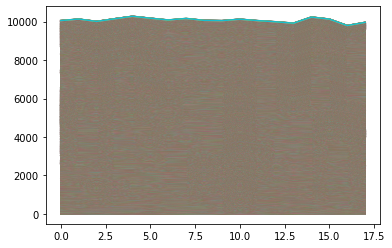

In [104]:
#plt.plot(data_photon_counts[1:19])

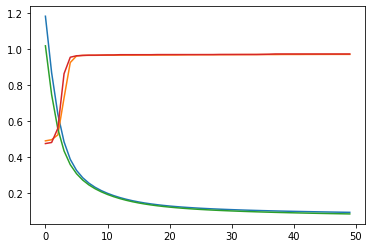

In [131]:
plt.plot(pd.DataFrame(history.history))

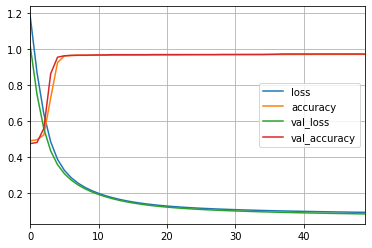

In [137]:
import pandas as pd
pd.DataFrame(history.history).plot()
plt.grid(True)

In [152]:
model_nn.evaluate(scaled_test_data, test_label)

125/125 [==============================] - 0s 3ms/step - loss: 0.0933 - accuracy: 0.9712


[0.09330495446920395, 0.9712499976158142]

In [157]:
mat_2 = scipy.io.loadmat('training_50_110.mat')

In [169]:
#dataset_2
data_plus_photon_2 = np.cumsum(mat_2["data_plus"], axis = 1)
data_minus_photon_2 = np.cumsum(mat_2["data_minus"], axis = 1)
data_zero_photon_2 = np.cumsum(mat_2["data_zero"], axis = 1)
data_photon_counts_2 = np.concatenate((data_minus_photon_2, data_plus_photon_2, data_zero_photon_2))



In [170]:
scaled_data_photon_counts_2 = scaler.transform(data_photon_counts_2)

In [171]:
model_nn.evaluate(scaled_data_photon_counts_2, photon_count_label)

313/313 [==============================] - 1s 2ms/step - loss: 0.1326 - accuracy: 0.9708


[0.13260768353939056, 0.97079998254776]

In [162]:
mat_2b = scipy.io.loadmat('test2.mat')

In [164]:
cum_test_data_2 = np.cumsum(mat_2b["data_test"], axis = 1)

In [167]:
scaled_test_data2 = scaler.transform(cum_test_data_2)

In [168]:
model_nn.evaluate(scaled_test_data2, test_label)

125/125 [==============================] - 0s 2ms/step - loss: 0.1403 - accuracy: 0.9647


[0.14027638733386993, 0.9647499918937683]

In [177]:
mat_3 = scipy.io.loadmat('training3.mat') #50, 70
mat_3b = scipy.io.loadmat('test3.mat')


data_plus_photon_3 = np.cumsum(mat_3["data_plus"], axis = 1)
data_minus_photon_3 = np.cumsum(mat_3["data_minus"], axis = 1)
data_zero_photon_3 = np.cumsum(mat_3["data_zero"], axis = 1)
data_photon_counts_3 = np.concatenate((data_minus_photon_3, data_plus_photon_3, data_zero_photon_3))
cum_test_data_3 = np.cumsum(mat_3b["data_test"], axis = 1)


In [178]:
scaled_data_photon_counts_3 = scaler.transform(data_photon_counts_3)
scaled_test_data3 = scaler.transform(cum_test_data_3)

In [179]:
model_nn.evaluate(scaled_test_data3, test_label)

125/125 [==============================] - 0s 2ms/step - loss: 0.1177 - accuracy: 0.9718


[0.11767323315143585, 0.971750020980835]

In [180]:
model_nn.evaluate(scaled_data_photon_counts_3, photon_count_label)

313/313 [==============================] - 1s 2ms/step - loss: 0.1160 - accuracy: 0.9721


[0.11598477512598038, 0.972100019454956]

In [181]:
mat_4 = scipy.io.loadmat('training4.mat') #40, 90
mat_4b = scipy.io.loadmat('test4.mat')


data_plus_photon_4 = np.cumsum(mat_4["data_plus"], axis = 1)
data_minus_photon_4 = np.cumsum(mat_4["data_minus"], axis = 1)
data_zero_photon_4 = np.cumsum(mat_4["data_zero"], axis = 1)
data_photon_counts_4 = np.concatenate((data_minus_photon_4, data_plus_photon_4, data_zero_photon_4))
cum_test_data_4 = np.cumsum(mat_4b["data_test"], axis = 1)


In [182]:
scaled_data_photon_counts_4 = scaler.transform(data_photon_counts_4)
scaled_test_data4 = scaler.transform(cum_test_data_4)

In [183]:
model_nn.evaluate(scaled_data_photon_counts_4, photon_count_label)

313/313 [==============================] - 1s 2ms/step - loss: 0.0736 - accuracy: 0.9813


[0.07362331449985504, 0.9812999963760376]

In [184]:
model_nn.evaluate(scaled_test_data4, test_label)

125/125 [==============================] - 0s 2ms/step - loss: 0.0725 - accuracy: 0.9815


[0.07252469658851624, 0.9815000295639038]

In [185]:
mat_5 = scipy.io.loadmat('training4.mat') #30, 90
mat_5b = scipy.io.loadmat('test4.mat')


data_plus_photon_5 = np.cumsum(mat_5["data_plus"], axis = 1)
data_minus_photon_5 = np.cumsum(mat_5["data_minus"], axis = 1)
data_zero_photon_5 = np.cumsum(mat_5["data_zero"], axis = 1)
data_photon_counts_5 = np.concatenate((data_minus_photon_5, data_plus_photon_5, data_zero_photon_5))
cum_test_data_5 = np.cumsum(mat_5b["data_test"], axis = 1)

In [186]:
scaled_data_photon_counts_5 = scaler.transform(data_photon_counts_5)
scaled_test_data5 = scaler.transform(cum_test_data_5)

In [187]:
model_nn.evaluate(scaled_data_photon_counts_5, photon_count_label)

313/313 [==============================] - 1s 2ms/step - loss: 0.0736 - accuracy: 0.9813


[0.07362331449985504, 0.9812999963760376]

In [188]:
model_nn.evaluate(scaled_test_data5, test_label)

125/125 [==============================] - 0s 3ms/step - loss: 0.0725 - accuracy: 0.9815


[0.07252469658851624, 0.9815000295639038]

NameError: name 'history' is not defined